In [2]:
!pip install prophet

In [3]:


from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

# Load merged data
df = pd.read_csv(r"C:\Users\naman\OneDrive\Desktop\PRJ\data\processed\merged_data.csv")


In [5]:

# Keep only 'ds' and 'y' for Prophet
df_prophet = df[['ds', 'y']]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])


C:\Users\naman\AppData\Local\Temp\ipykernel_2608\1848312164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])


In [6]:

# Fit the model
model = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)


16:33:32 - cmdstanpy - INFO - Chain [1] start processing
16:33:35 - cmdstanpy - INFO - Chain [1] done processing


In [7]:

# Forecast for same time range
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)


Text(0.5, 1.0, 'Flu Forecast (%ILI) with Prophet')

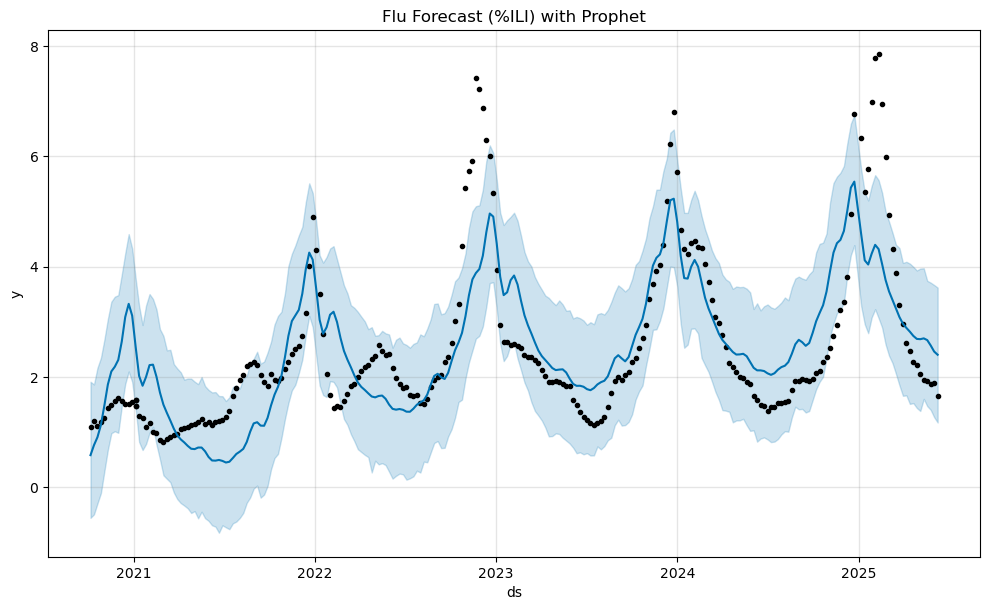

In [8]:

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Flu Forecast (%ILI) with Prophet")


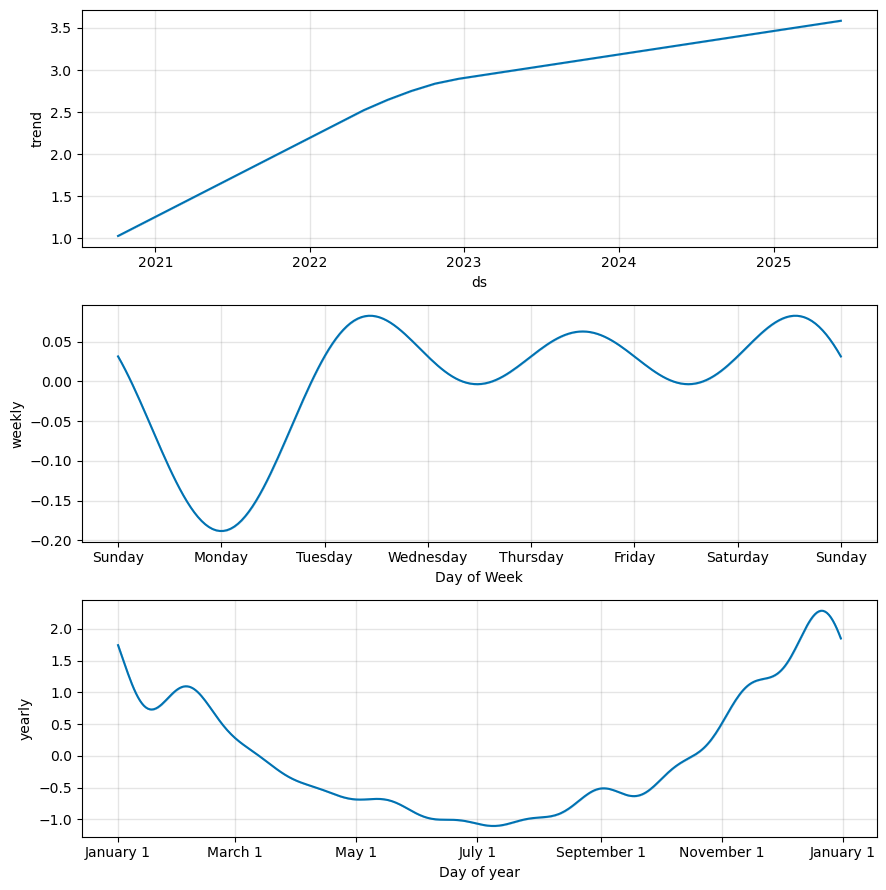

In [9]:

# Plot changepoints (anomalies or structural changes)
fig2 = model.plot_components(forecast)


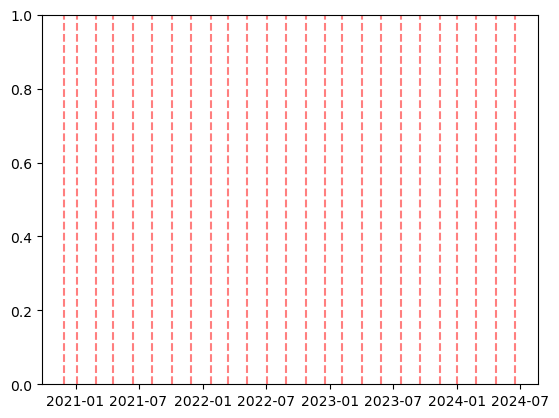

In [10]:

# Optional: highlight changepoints manually
for cp in model.changepoints:
    plt.axvline(cp, color='red', linestyle='--', alpha=0.5)

plt.show()
